In [33]:
##### Importation des librairies
import numpy.linalg
import numpy as np
import matplotlib.pyplot as plt

Dans ce TP nous utiliserons une base de données d'images "Yale Face" -- http://cvc.cs.yale.edu/cvc/projects/yalefaces/yalefaces.html

# Exercice 1 :

Les vecteurs $id$ et $cat$ donnent des informations sur les images : $id[k]$ et $cat[k]$ sont respectivement l'identification (un index) et la catégorie du visage $k$. Ces vecteurs sont disponibles pour la référence et les bases de tests et seront utiles dans la suite.

Pour charger la base de données, il suffit de lire le fichier `YaleFaces.mat` 
fourni sur Moodle, il contient  les matrices et vecteurs $\mathbf X^{train}, \mathbf X^{test}, id^{train }, identifiant^{test}, cat^{train}, cat^{test}$.

In [35]:

## Chargement de la base de données YaleFaces 
import scipy.io


yaleFaces = scipy.io.loadmat('./YaleFaces.mat')

#  Train set (90 faces)
X_train = yaleFaces['X_train']
cat_train = yaleFaces['cat_train'][0]
id_train = yaleFaces['id_train'][0]-1

# Test set (30 faces)
X_test = yaleFaces['X_test']
cat_test = yaleFaces['cat_test'][0]
id_test = yaleFaces['id_test'][0]-1

# Images qui ne contient pas de visage
X_noface = yaleFaces['X_noface']

1. Écrivez une fonction qui calcule le visage moyen $x_{moy}$. 

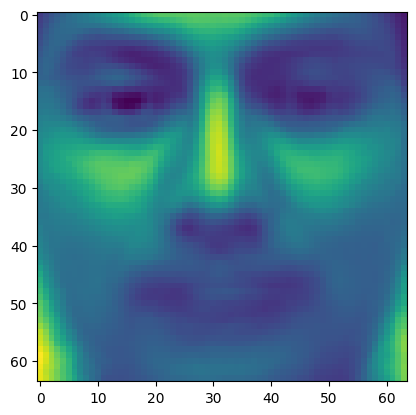

In [36]:
def visageMoyen(X):
    return np.mean(X,axis=1)

xMoy = visageMoyen(X_train).reshape(64,64).transpose()
plt.imshow(xMoy)

# xMoy2 = visageMoyen(X_test).reshape(64,64).transpose()
# plt.imshow(xMoy2)

2. Écrivez une fonction qui normalise au centre les visages (soustraire le visage moyen de l'image)

In [56]:
def visageCentre(X):
    return (X.transpose() - visageMoyen(X)).transpose()

xCentre = visageCentre(X_train)

3. Écrivez une fonction `vecAImage()` qui prend comme argument un visage, représenté comme un vecteur de 4096 éléments, et renvoie une image de taille $64\times64$. 

    Note : la base de données "Yale Faces" a été créée sous Matlab, pour laquelle les matrices sont organisées colonne par colonne. Il peut être utile de transposer la matrice.

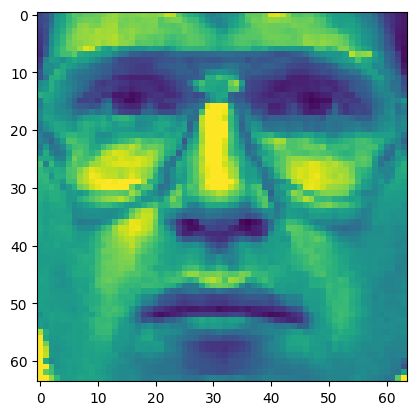

In [62]:
def vecAImage(V):
    return V.reshape(64,64).transpose()

xCentre = vecAImage(visageCentre(X_train.transpose())[0])
plt.imshow(xCentre)

4. Affichez le visage moyen, ainsi que quelques visages avec les visages centrés associés.

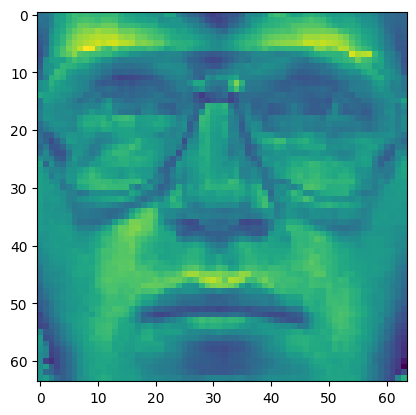

In [72]:
plt.imshow(xMoy)

plt.imshow(vecAImage(X_train.transpose()[0]))
plt.imshow(vecAImage(visageCentre(X_train).transpose()[0]))

# Exercice 2 : Réduction de dimension

La réduction de dimension pour une image est un processus visant à réduire le nombre de variables (ou dimensions) nécessaires pour représenter cette image tout en conservant autant d'informations importantes que possible. Cela peut être accompli à l'aide de diverses méthodes, dont l'une des plus courantes est l'Analyse en Composantes Principales (ACP). Ces méthodes visent à extraire **les eigenfaces qui  sont donc les vecteurs propres de la matrice de covariance $\mathbf X_c\mathbf X_c^\top$**, de taille $d\times d$, où la matrice $\mathbf X_c$ de la même taille que $\mathbf X$ représente tous les visages centrés :
$$\mathbf X_c= \left[ x_0-x_{moy}, \cdots x_{n-1}-x_{moy}\right]$$
Chaque ligne de $\mathbf X_c$ correspond à un pixel $p$, chaque colonne de $\mathbf X_c$ correspond à un visage de référence d'indice $k$.

Plutôt que d'utiliser la décomposition en valeurs propres, nous utiliserons la décomposition en valeurs singulières (SVD). La SVD décompose la matrice $\mathbf X_c$ de taille $d\times n$ en 3 matrices $\mathbf U$, $\mathbf S$, $\mathbf V$ telles que :

$$\mathbf X_c=\mathbf U \mathbf S\mathbf V^\top$$

où $\mathbf U$ et $\mathbf V$ sont des matrices orthogonales ($\mathbf U \mathbf U^\top=\mathbf U^\top \mathbf U=\mathbf I_d^d$ et $\mathbf V \mathbf V^\top=\mathbf V^\top \mathbf V=\mathbf I_d^n$) de tailles respectives $d\times d$ et $n\times n$, et $\mathbf S$ est une matrice de taille $d\times n$ avec des éléments nuls partout sauf sur la diagonale principale.

Cette décomposition a les propriétés suivantes :
- les colonnes de $\mathbf V$ sont les vecteurs propres de $\mathbf X_c^\top\mathbf X_c$, 
- les colonnes de $\mathbf U$ sont les vecteurs propres de $\mathbf X_c\mathbf X_c^\top$,
- la matrice $\mathbf S$ est diagonale. La diagonale représente les valeurs singulières de $\mathbf X_c$, égales aux racines carrées des valeurs propres $\lambda_k$ de $\mathbf X_c^\top\mathbf X_c$ et $\mathbf X_c\mathbf X_c^\top$. 

Avec Numpy, la SVD peut être calculée de la manière suivante :

`U, S, V = numpy.linalg.svd(Xc)`

Dans notre cas, $n<d$, et les valeurs propres $\lambda_k$ de $\mathbf X_c\mathbf X_c^\top$ sont donc toutes nulles pour $k>n$.
Nous n'aurons pas besoin des vecteurs propres associés $k>n$. 
La fonction `svd` a un mode rapide, qui ne calcule que les vecteurs propres correspondant aux colonnes de la matrice passée en argument :

`U, S, V = svd(Xc, full_matrices=False)`

Cette commande renvoie les matrices $\mathbf U$ et $\mathbf V$, de taille $d\times n$ et $n\times n$, et la matrice $\mathbf U$ a été tronquée, seules les premières $n$ colonnes sont conservées :
$$\mathbf U= \left[ u_1, \cdots, u_n\right]$$
Finalement, `S` est un vecteur de taille $n$ et représente la matrice diagonale $\mathbf S$.

1. Écrivez une fonction `eigenfaceSVD(Xc)` qui renvoie un t-uple constitué de la matrice $\mathbf U$ de faces propres, calculée à partir d'une base de données centrée $\mathbf X_c$, et du tableau des valeurs propres associées.


In [75]:
def eigenfaceSVD(Xc):
    U, S, _ = np.linalg.svd(Xc, full_matrices=False)
    return U, S 

        
2. Utilisez cette fonction pour calculer $\mathbf U$ et $\mathbf S$. Normalisez ensuite les valeurs propres pour que leur somme soit égale à 1.


In [ ]:
U, S = eigenfaceSVD(Xc)

S_normalized = S / np.sum(S)
u_normalized = U / np.sum(U)


3. Affichez la face moyenne et les 15 premières faces propres (utilisez la fonction `plt.subplot()`). et leurs propres valeurs associées. Donnez votre interprétation des images des eigenface ?



4. Tracez la courbe de la somme cumulée des valeurs propres normalisées, pour voir quelle quantité de variation est capturée par les premières faces propres $K$. Combien de faces propres faut-il pour obtenir une bonne reconstruction ?

# Exercice 3 : Classification

1. Appliquer la méthode de réduction de dimension PCA sur la base de données (Visage ou Pas)


In [ ]:
def pca_reduction(X, k):

    X_mean = np.mean(X, axis=1, keepdims=True)
    Xc = X - X_mean

    U, _ = eigenfaceSVD(Xc)
    
    W = U[:, :k]
    
    X_pca = np.dot(W.T, Xc)
    
    return X_pca

2. Réaliser une classification des images réduites à l'aide d'un algorithme simple tel que le k-plus proches voisins (k-NN) 

3. Affichez les résultats de classification (les prédictions correctes et incorrectes)

4. Appliquer une méthode de classification non supervisé sur le jeu de données et afficher une partie des images par cluster